In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# load the data
X = []
Y = []
for line in open('data_2d.csv'):
    x1, x2, y = line.split(',')
    X.append([float(x1), float(x2), 1]) # add the bias term
    Y.append(float(y))


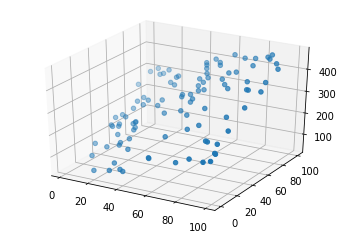

array([[17.93020121, 94.52059195,  1.        ],
       [97.14469719, 69.59328198,  1.        ],
       [81.77590078,  5.7376481 ,  1.        ],
       [55.85434242, 70.32590168,  1.        ],
       [49.36654999, 75.11404016,  1.        ],
       [ 3.19270247, 29.25629886,  1.        ],
       [49.20078406, 86.14443851,  1.        ],
       [21.8828039 , 46.8415052 ,  1.        ],
       [79.50986272, 87.39735554,  1.        ],
       [88.1538875 , 65.20564193,  1.        ],
       [60.74385434, 99.9576339 ,  1.        ],
       [67.41558195, 50.36830961,  1.        ],
       [48.31811577, 99.12895314,  1.        ],
       [28.82997197, 87.18494885,  1.        ],
       [43.85374266, 64.47363908,  1.        ],
       [25.31369409, 83.54529426,  1.        ],
       [10.80772667, 45.69556859,  1.        ],
       [98.36574588, 82.69739353,  1.        ],
       [29.14690997, 66.36510676,  1.        ],
       [65.1003019 , 33.3538835 ,  1.        ],
       [24.64411349, 39.54005274,  1.   

In [0]:
# let's turn X and Y into numpy arrays since that will be useful later
X = np.array(X)
Y = np.array(Y)


# let's plot the data to see what it looks like
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()
X

In [0]:
# apply the equations we learned to calculate a and b
# numpy has a special method for solving Ax = b
# so we don't use x = inv(A)*b
# note: the * operator does element-by-element multiplication in numpy

#       np.dot() does what we expect for matrix multiplication
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = np.dot(X, w)
print("Co_effiecents:",w)

Co_effiecents: [2.01666793 2.96985048 1.46191241]


In [0]:

# determine how good the model is by computing the r-squared
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print("the r-squared is:", r2)


the r-squared is: 0.9980040612475778


In [0]:
# Multipile Linear Regression Using Sklearn

In [0]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Models coeffiecnts usinf Sklearn:',model1.coef_)

Models coeffiecnts usinf Sklearn: [2.01666793 2.96985048 0.        ]


In [0]:
print('Models coeffiecnts usinf Sklearn:',model1.intercept_)

Models coeffiecnts usinf Sklearn: 1.461912414561425


In [0]:
ypred=model1.predict(X)

ypred[0]


318.3331999381785

In [0]:
from sklearn.metrics import r2_score
r2_score(Y, ypred)

0.9980040612475778

# Multiple Linear Regression Using Oridinary Least Square Method

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [0]:
model = sm.OLS(Y,X)
lr = model.fit()
print('\nsummary:\n',lr.summary())



summary:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.425e+04
Date:                Thu, 08 Aug 2019   Prob (F-statistic):          1.14e-131
Time:                        14:34:25   Log-Likelihood:                -297.26
No. Observations:                 100   AIC:                             600.5
Df Residuals:                      97   BIC:                             608.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0167      0.016    124.3